## Chapter 24:
  Time Series Prediction with Multilayer Perceptrons

### What we'll learn:

  About the airline passengers univariate time series prediction problem.

  How to phrase time series prediction as a regression problem and develop a neural network model for it.

  How to frame time series prediction with a time lag and develop a neural network model for it.

In [23]:
!wget https://c4science.ch/diffusion/2096/browse/master/input/international-airline-passengers.csv

--2020-03-05 20:48:59--  https://c4science.ch/diffusion/2096/browse/master/input/international-airline-passengers.csv
Resolving c4science.ch (c4science.ch)... 86.119.26.165
Connecting to c4science.ch (c4science.ch)|86.119.26.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘international-airline-passengers.csv.3’

international-airli     [  <=>               ]  61.05K   226KB/s    in 0.3s    

2020-03-05 20:49:02 (226 KB/s) - ‘international-airline-passengers.csv.3’ saved [62519]



In [0]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('international-airline-passengers.csv.3', usecols=[1], engine='python', skipfooter=4) # , usecols=[1], engine='python', skipfooter=3
data

,initial-scale=1
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


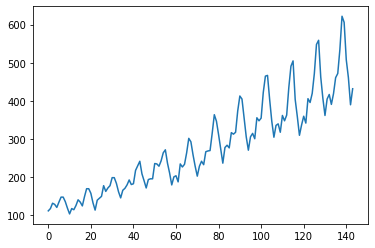

In [33]:
# Plot the data
plt.plot(data)
plt.show()

### Using Multilayer Perceptron

In [0]:
# Import modules
import math
from keras.models import Sequential
from keras.layers import Dense
# Fix random seed for reproducibility
np.random.seed(7)

In [0]:
# Convert the dataset
data = data.values.astype('float32')

In [37]:
# Split into train and test sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size, :], data[train_size:len(data),:]
print(len(train), len(test))

96 48


In [0]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [39]:
# Reshape into X = t and Y = t + 1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
len(testX), len(testY), len(trainX), len(trainY)

(46, 46, 94, 94)

In [40]:
# Create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)








Epoch 1/200





 - 1s - loss: 47555.7088
Epoch 2/200
 - 0s - loss: 41618.0998
Epoch 3/200
 - 0s - loss: 35652.8778
Epoch 4/200
 - 0s - loss: 29440.9535
Epoch 5/200
 - 0s - loss: 23363.8786
Epoch 6/200
 - 0s - loss: 17680.2616
Epoch 7/200
 - 0s - loss: 12747.3321
Epoch 8/200
 - 0s - loss: 8661.5651
Epoch 9/200
 - 0s - loss: 5574.1966
Epoch 10/200
 - 0s - loss: 3426.3035
Epoch 11/200
 - 0s - loss: 2063.7671
Epoch 12/200
 - 0s - loss: 1287.9797
Epoch 13/200
 - 0s - loss: 866.3531
Epoch 14/200
 - 0s - loss: 674.7100
Epoch 15/200
 - 0s - loss: 585.0535
Epoch 16/200
 - 0s - loss: 555.0911
Epoch 17/200
 - 0s - loss: 546.6955
Epoch 18/200
 - 0s - loss: 547.3889
Epoch 19/200
 - 0s - loss: 538.8350
Epoch 20/200
 - 0s - loss: 538.5315
Epoch 21/200
 - 0s - loss: 536.9792
Epoch 22/200
 - 0s - loss: 536.0258
Epoch 23/200
 - 0s - loss: 537.1211
Epoch 24/200
 - 0s - loss: 535.7809
Epoch 25/200
 - 0s - loss: 538.2061
Epoch 26/200
 - 0s - loss: 538.4683
Epoch 27/200
 - 0s - loss: 538.2258
Epoch 

In [41]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' %(trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' %(testScore, math.sqrt(testScore)))

Train Score: 531.71 MSE (23.06 RMSE)
Test Score: 2355.06 MSE (48.53 RMSE)


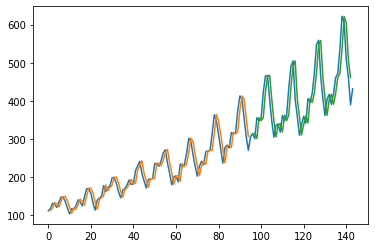

In [43]:
# Generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2)+1:len(data)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(data)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Blue=Whole Dataset, Orange=Training, Green=Predictions.

### Multilayer Perceptron Using the Window Method

In [44]:
# Reshape into X = t and Y = t + 1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
len(testX), len(testY), len(trainX), len(trainY)

(37, 37, 85, 85)

In [45]:
# Create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 173216.6577
Epoch 2/200
 - 0s - loss: 30555.4399
Epoch 3/200
 - 0s - loss: 3064.3383
Epoch 4/200
 - 0s - loss: 2074.0081
Epoch 5/200
 - 0s - loss: 2067.0350
Epoch 6/200
 - 0s - loss: 2094.4138
Epoch 7/200
 - 0s - loss: 2019.0804
Epoch 8/200
 - 0s - loss: 2017.0779
Epoch 9/200
 - 0s - loss: 1981.7187
Epoch 10/200
 - 0s - loss: 1888.9990
Epoch 11/200
 - 0s - loss: 1850.0947
Epoch 12/200
 - 0s - loss: 1835.8090
Epoch 13/200
 - 0s - loss: 1811.9921
Epoch 14/200
 - 0s - loss: 1782.4161
Epoch 15/200
 - 0s - loss: 1755.3406
Epoch 16/200
 - 0s - loss: 1704.2348
Epoch 17/200
 - 0s - loss: 1693.1705
Epoch 18/200
 - 0s - loss: 1678.4676
Epoch 19/200
 - 0s - loss: 1671.4143
Epoch 20/200
 - 0s - loss: 1596.0100
Epoch 21/200
 - 0s - loss: 1541.0262
Epoch 22/200
 - 0s - loss: 1704.6087
Epoch 23/200
 - 0s - loss: 1504.3939
Epoch 24/200
 - 0s - loss: 1496.1754
Epoch 25/200
 - 0s - loss: 1475.1291
Epoch 26/200
 - 0s - loss: 1533.6868
Epoch 27/200
 - 0s - loss: 1405.2112
Epoch 2

In [46]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' %(trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' %(testScore, math.sqrt(testScore)))

Train Score: 411.52 MSE (20.29 RMSE)
Test Score: 1387.18 MSE (37.24 RMSE)


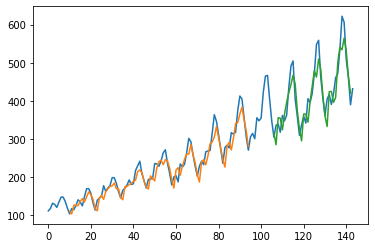

In [47]:
# Generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2)+1:len(data)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(data)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Blue=Whole Dataset, Orange=Training, Green=Predictions